In [109]:
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [110]:
df = pd.read_csv('gapminder_tidy.csv',parse_dates=['Year'], index_col='Year')
df.head()


,Country,fertility,life,population,child_mortality,gdp,region
Year,,,,,,,
1964-01-01,Afghanistan,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1965-01-01,Afghanistan,7.671,34.152,10697983.0,334.1,1182.0,South Asia
1966-01-01,Afghanistan,7.671,34.662,10927724.0,328.7,1168.0,South Asia
1967-01-01,Afghanistan,7.671,35.170,11163656.0,323.3,1173.0,South Asia
1968-01-01,Afghanistan,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [111]:
df.dtypes

Country             object
fertility          float64
life               float64
population         float64
child_mortality    float64
gdp                float64
region              object
dtype: object

In [112]:
df.isna().sum()

Country               0
fertility            11
life                  0
population            3
child_mortality     901
gdp                1111
region                0
dtype: int64

In [144]:
for col in df.columns[df.isnull().any()]:
    df[col].fillna(df[col].mode()[0],inplace=True)
# Print remaining columns which still have NaN values
df.columns[df.isnull().any()]

Index([], dtype='object')

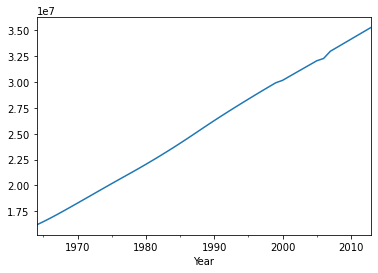

In [113]:
df.population.resample("Y").mean().plot()

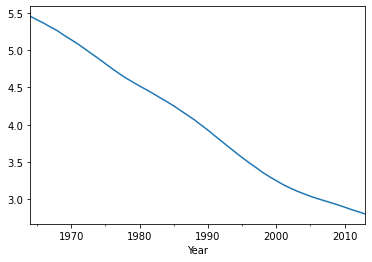

In [114]:
df.fertility.resample("Y").mean().plot()

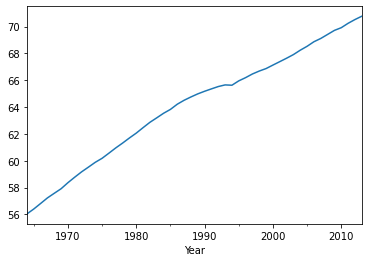

In [115]:
df.life.resample("Y").mean().plot()

In [118]:
df.shape

(10111, 7)

In [119]:
df1.shape

(50, 8)

In [120]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Rep.', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Rep.', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Gu

In [155]:
#Analysis for brazil

df_1= df[df['Country']=='Brazil']
df_1.isna().sum()

Country            0
fertility          0
life               0
population         0
child_mortality    0
gdp                0
region             0
dtype: int64

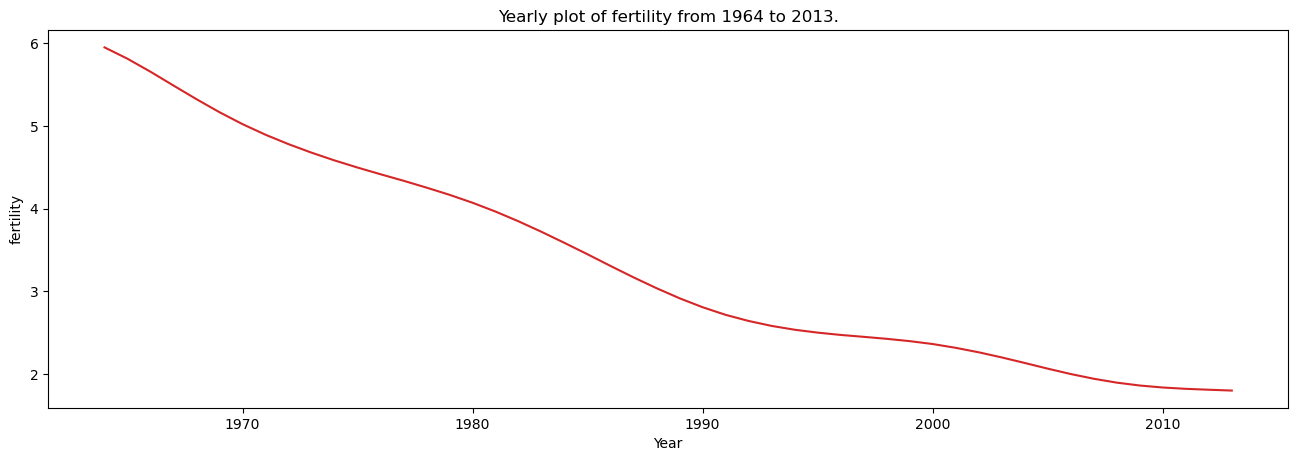

In [156]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='fertility', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df_1.index, y=df_1.fertility, title='Yearly plot of fertility from 1964 to 2013.')  

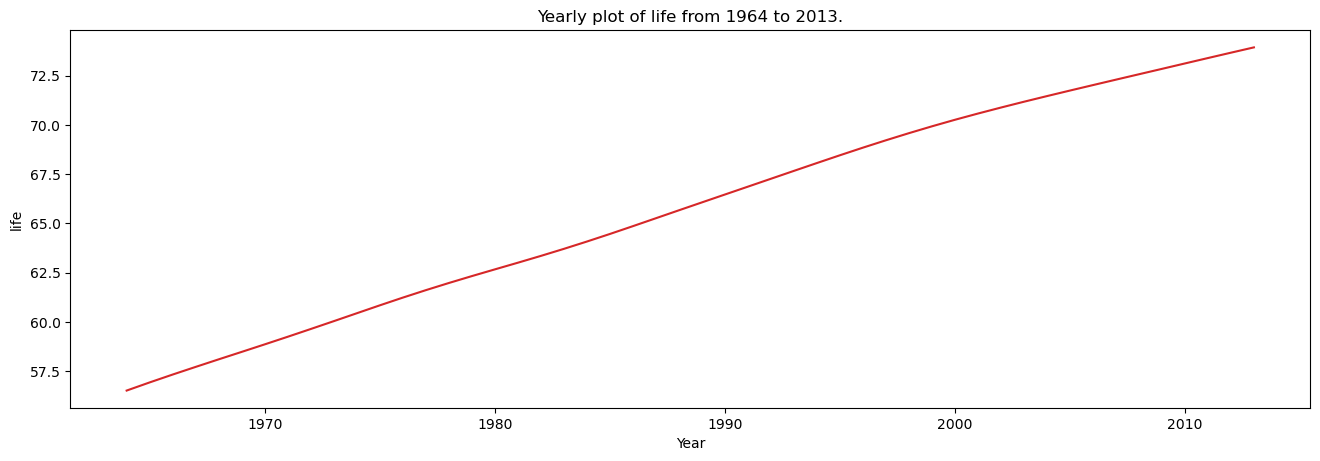

In [157]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='life', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df_1.index, y=df_1.life, title='Yearly plot of life from 1964 to 2013.')  

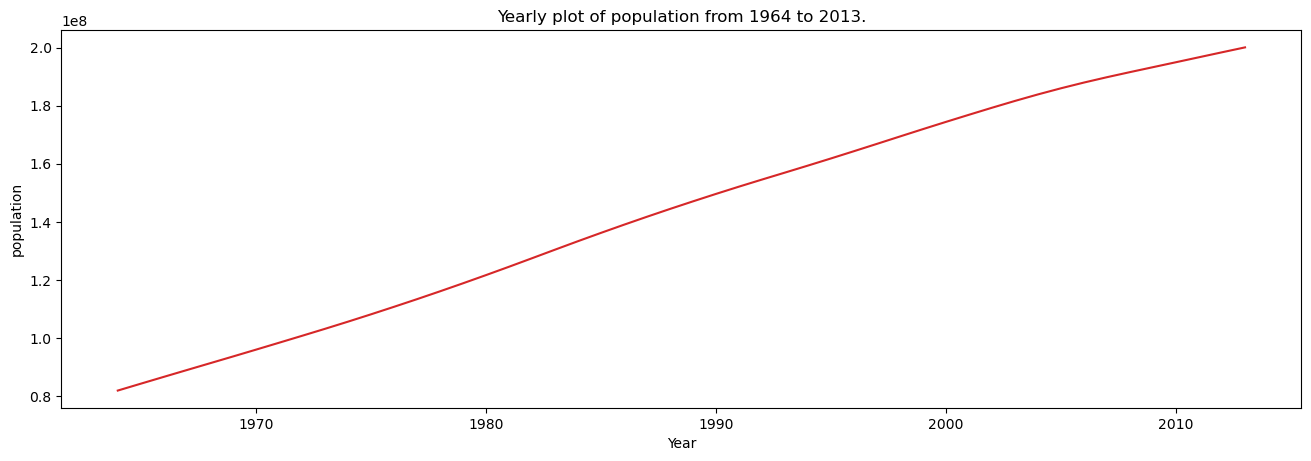

In [158]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='population', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df_1.index, y=df_1.population, title='Yearly plot of population from 1964 to 2013.')  

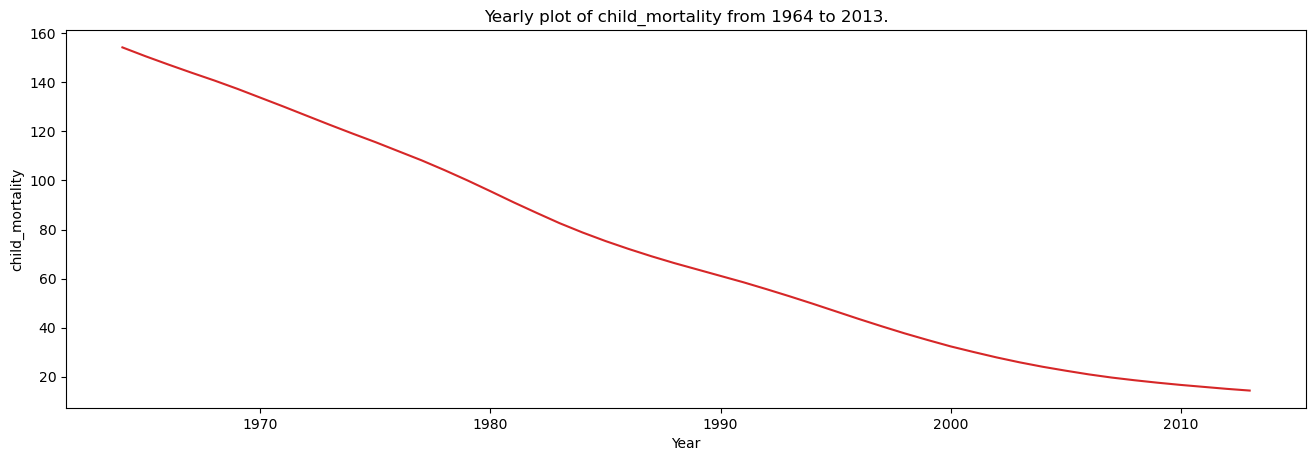

In [159]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='child_mortality', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df_1.index, y=df_1.child_mortality, title='Yearly plot of child_mortality from 1964 to 2013.')  

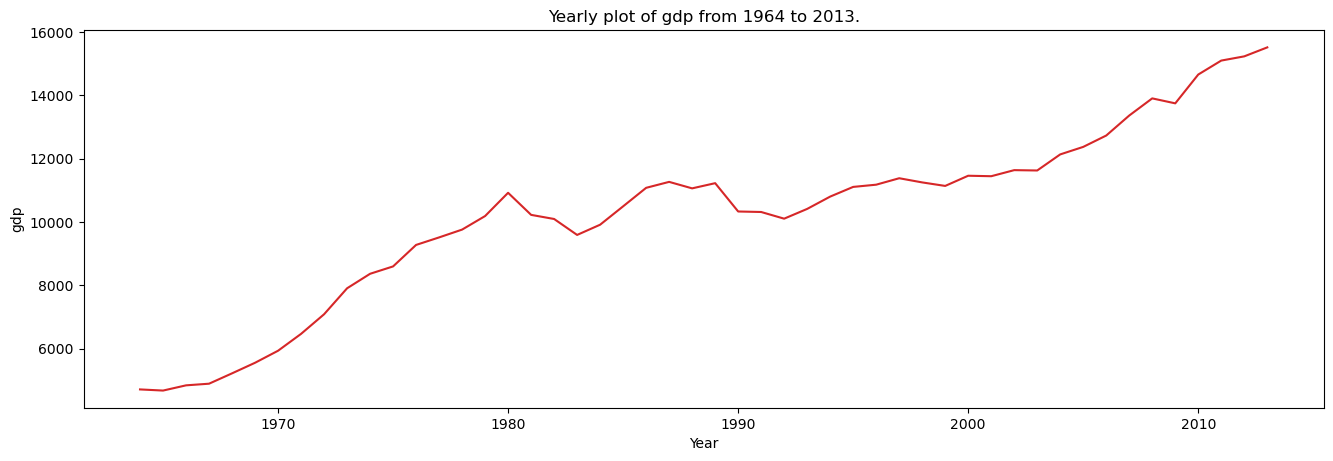

In [160]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='gdp', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df_1.index, y=df_1.gdp, title='Yearly plot of gdp from 1964 to 2013.')  

In [161]:
corr=df_1.corr()

In [162]:
import seaborn as sns

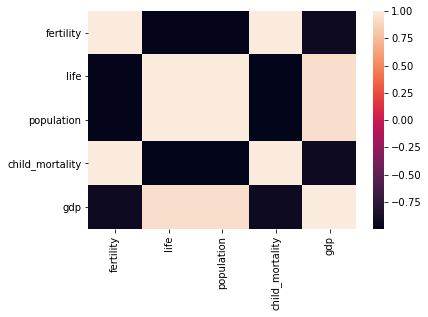

In [163]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

                     gdp
Year                    
1964-01-01   5972.292079
1965-01-01   6285.623762
1966-01-01   6598.732673
1967-01-01   6933.316832
1968-01-01   7389.910891
1969-01-01   7878.831683
1970-01-01   8374.128713
1971-01-01   8660.891089
1972-01-01   8888.975248
1973-01-01   9311.940594
1974-01-01  10406.500000
1975-01-01  10223.282178
1976-01-01  10681.198020
1977-01-01  10801.876238
1978-01-01  10860.980198
1979-01-01  11454.405941
1980-01-01  11595.638614
1981-01-01  11233.851485
1982-01-01  10835.049505
1983-01-01  10722.450495
1984-01-01  10836.772277
1985-01-01  10742.940594
1986-01-01  10620.361386
1987-01-01  10785.272277
1988-01-01  10858.103960
1989-01-01  11115.450495
1990-01-01  11252.346535
1991-01-01  11074.267327
1992-01-01  11179.311881
1993-01-01  11231.653465
1994-01-01  11434.801980
1995-01-01  11676.613861
1996-01-01  11937.935644
1997-01-01  12322.438424
1998-01-01  12554.758621
1999-01-01  12732.921182
2000-01-01  13164.433498
2001-01-01  13288.108374


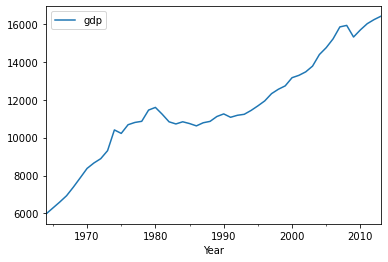

In [164]:
df_2=df.groupby(by=df.index)[["gdp"]].mean()
print(df_2)
df_2.plot()

In [165]:
df_3=df[df['region']=='America']

                  gdp
Year                 
1964-01-01   5805.900
1965-01-01   6015.875
1966-01-01   6192.600
1967-01-01   6352.025
1968-01-01   6514.725
1969-01-01   6711.125
1970-01-01   6831.425
1971-01-01   7005.475
1972-01-01   7161.575
1973-01-01   7457.200
1974-01-01   7567.900
1975-01-01   7498.175
1976-01-01   7739.125
1977-01-01   8022.350
1978-01-01   8338.750
1979-01-01   8617.375
1980-01-01   8760.525
1981-01-01   8824.475
1982-01-01   8565.100
1983-01-01   8461.000
1984-01-01   8648.550
1985-01-01   8781.700
1986-01-01   8984.775
1987-01-01   9245.800
1988-01-01   9507.125
1989-01-01   9688.425
1990-01-01   9710.650
1991-01-01   9757.375
1992-01-01   9816.950
1993-01-01   9898.625
1994-01-01  10133.950
1995-01-01  10219.275
1996-01-01  10381.425
1997-01-01  10731.025
1998-01-01  11026.100
1999-01-01  11154.525
2000-01-01  11389.175
2001-01-01  11418.675
2002-01-01  11408.075
2003-01-01  11594.700
2004-01-01  12000.550
2005-01-01  12375.200
2006-01-01  12800.000
2007-01-01

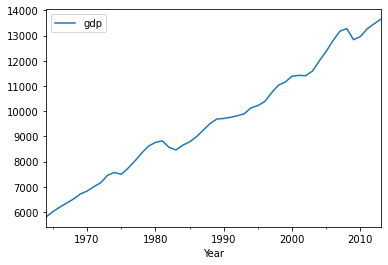

In [166]:
df_4=df_3.groupby(by=dfa.index)[["gdp"]].mean()
print(df_4)
df_4.plot()